# Loading the data

In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

from google.cloud import bigquery     # If you are working locally, make sure you have Google Cloud library installed
import pandas as pd
from google.oauth2 import service_account


import pyarrow.parquet as pq

In [3]:

# Connect to BQ


credentials = service_account.Credentials.from_service_account_file(
'/Users/mariegeorgescudehillerin/Desktop/Le Wagon/Project/music-recommendation-system-24-e7b0bc87bbb3.json')
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'


project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

In [4]:
# Query BQ


query_job = client.query("""
  SELECT
     *
  FROM `music-recommendation-system-24.top_100.2024_spotify_top_100_artist_enriched`
  LIMIT 1000""")
#but the query in three quote marks




results = query_job.result() # Wait for the job to complete.


rows = [dict(row) for row in results]


# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

#Data Exploration

In [5]:
df.shape

(100, 26)

In [6]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_artist
3,track_popularity
4,track_album_name
5,track_album_release_year
6,duration_min
7,genres
8,record_label
9,danceability


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    float64
 10  energy                    100 non-null    float64
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [8]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
0,0nrRP2bk19rLc0orkWPQk2,Wake Me Up,Avicii,83,TRUE,2013,4.12,EDM,Universal Music AB,53.2,...,0.12,16.10,64.3,124,4,0nrRP2bk19rLc0orkWPQk2,[1vCWHaC5f2uS3yhpwWbIA6],[Avicii],[23107521],[81]
1,0lYBSQXN6rCTvUZvg9S0lU,Let Me Love You,"DJ Snake,Justin Bieber",83,Encore,2016,3.43,EDM,DJ Snake Def Jam,47.5,...,0.00,13.50,15.9,200,4,0lYBSQXN6rCTvUZvg9S0lU,"[540vIaP2JwjQb9dm3aArA4, 1uNFoZAHBGtllmzznpCI3s]","[DJ Snake, Justin Bieber]","[8910877, 78641625]","[79, 91]"
2,7BqHUALzNBTanL6OvsqmC1,Happier,"Marshmello,Bastille",82,Happier,2018,3.57,EDM,Joytime Collective,68.7,...,0.00,16.70,67.1,100,4,7BqHUALzNBTanL6OvsqmC1,"[64KEffDW9EtZ1y2vBYgq8T, 7EQ0qTo7fWT7DPxmxtSYEc]","[Marshmello, Bastille]","[33882258, 5582338]","[84, 76]"
3,2YWjW3wwQIBLNhxWKBQd16,Lean On (feat. MØ & DJ Snake),"Major Lazer,MØ,DJ Snake",77,Peace Is The Mission : Extended,2015,2.94,EDM,Third Pardee Records,72.3,...,0.12,56.50,27.4,98,4,2YWjW3wwQIBLNhxWKBQd16,"[738wLrAtLtCtFOLvQBXOXp, 0bdfiayQAKewqEvaU6rXC...","[Major Lazer, MØ, DJ Snake]","[6206097, 1458940, 8910877]","[77, 72, 79]"
4,4cktbXiXOapiLBMprHFErI,Memories,Maroon 5,81,JORDI (Deluxe),2021,3.16,Pop,Interscope Records*,77.5,...,0.00,8.21,59.5,91,4,4cktbXiXOapiLBMprHFErI,[04gDigrS5kc9YWfZHwBETP],[Maroon 5],[43145812],[87]


#Data enriching

In [29]:
df['decade'] = (df['track_album_release_year'] // 10) * 10


#Musical features Exploration

#Data visualization

In [10]:
sorted_counts = df["genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="genres", title="genres Count",
             category_orders={"genres": sorted_genres})
fig.show()

##Artists

In [12]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(5)

,track_id,track_name,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
track_artist,,,,,,,,,,,,,,,,,,,,,
Bruno Mars,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Ed Sheeran,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
The Weeknd,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Coldplay,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Dua Lipa,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


##Musical eras

Which year is predominant in the Top 100 streamed songs?

In [13]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_album_release_year", ascending=False).head(5)

,track_id,track_name,track_artist,track_popularity,track_album_name,duration_min,genres,record_label,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
track_album_release_year,,,,,,,,,,,,,,,,,,,,,
2023,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2022,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2021,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2020,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2019,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


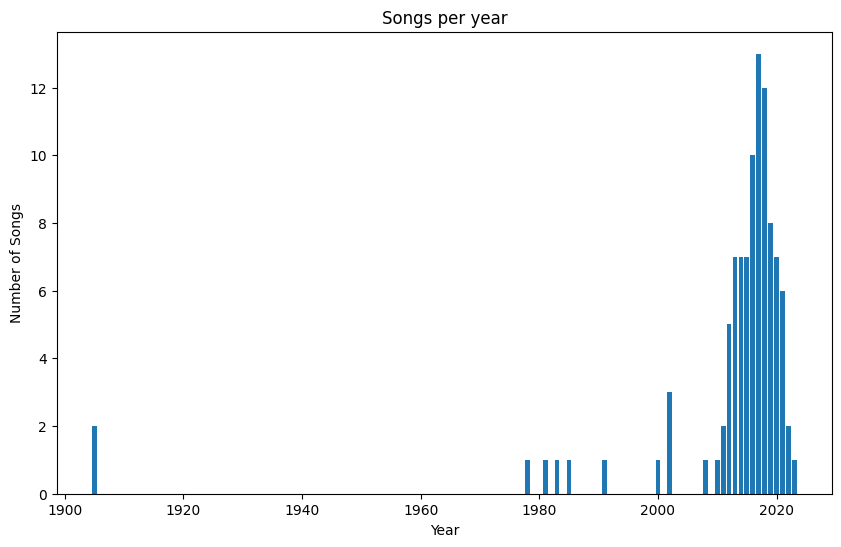

In [14]:
#visualize number of songs (track_name) per year
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


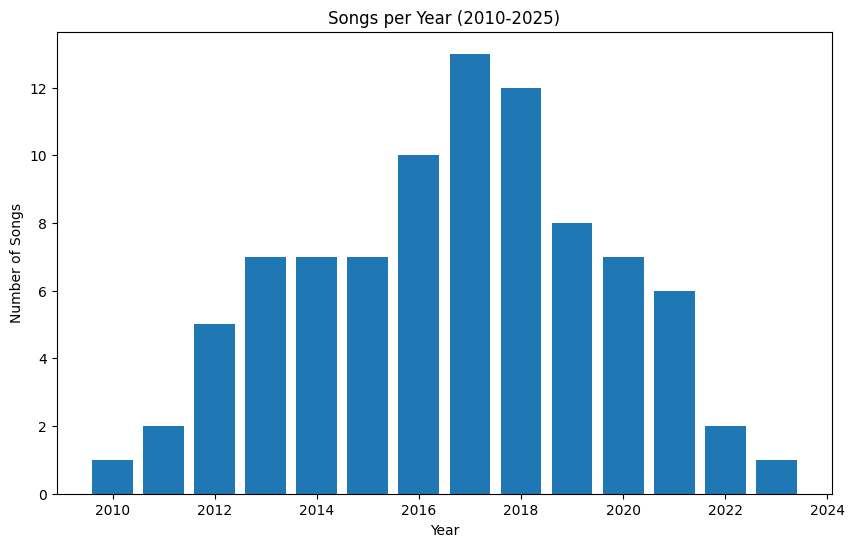

In [15]:
# Filter for the years 2010-2025
filtered_data = grouped_by_year[(grouped_by_year.index >= 2010) & (grouped_by_year.index <= 2025)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_data.index, filtered_data["track_name"])  # Assuming 'track_count' is the column with song counts
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Songs per Year (2010-2025)")
plt.show()

In [30]:
grouped_by_decade = df.groupby("decade").count()
grouped_by_decade.sort_values("track_name", ascending=False).head(5)

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
decade,,,,,,,,,,,,,,,,,,,,,
2010,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
2020,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2000,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1980,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1970,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


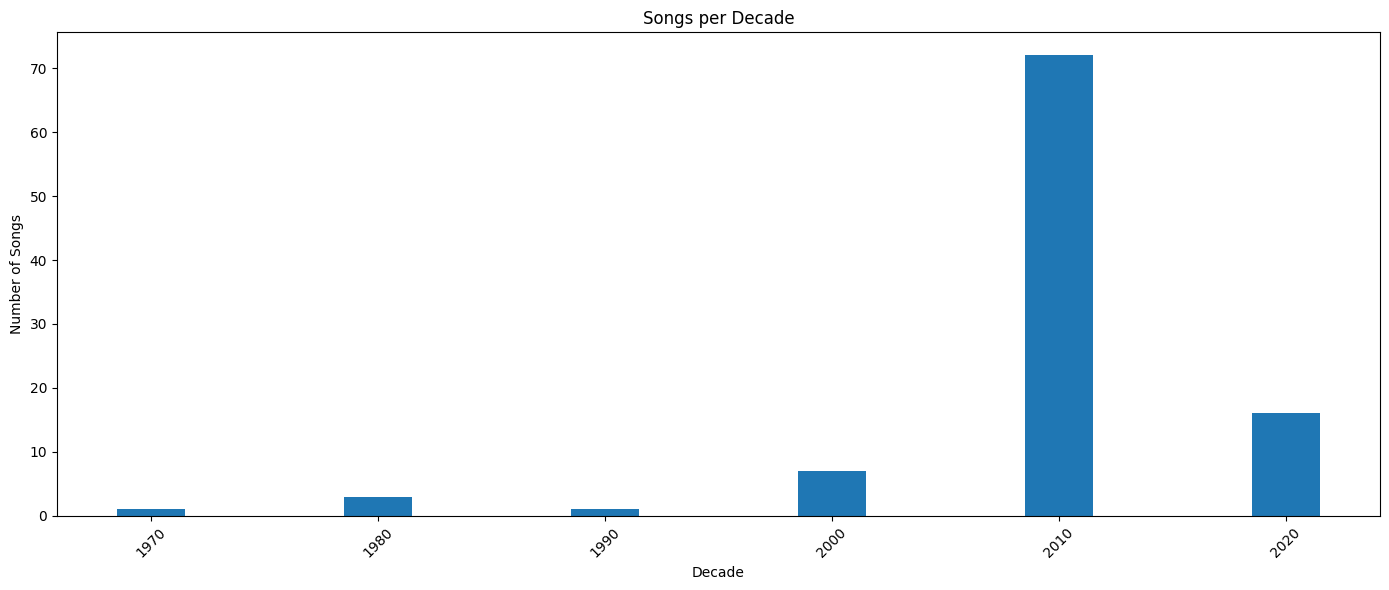

In [31]:
plt.figure(figsize=(14, 6))
bar_width = 3

plt.bar(grouped_by_decade.index, grouped_by_decade['track_name'], width=bar_width)

plt.xticks(
    ticks=grouped_by_decade.index,
    labels=grouped_by_decade.index,
    rotation=45,
)

plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.title('Songs per Decade')

plt.tight_layout()  # Prevent label overlap
plt.show()

In [32]:
print(df["track_album_release_year"].min())

1978


In [17]:
df[df["track_album_release_year"] == 1905]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
51,60a0Rd6pjrkxjPbaKzXjfq,In the End,Linkin Park,87,Hybrid Theory (Bonus Edition),1905,3.61,Rap,Warner Records,55.6,...,0.0,20.90,40.0,105,4,60a0Rd6pjrkxjPbaKzXjfq,[6XyY86QOPPrYVGvF9ch6wz],[Linkin Park],[27487288],[92]
59,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,85,Hot Fuss,1905,3.72,Rock,Island Records,35.2,...,0.0,9.95,23.6,148,4,003vvx7Niy0yvhvHt4a68B,[0C0XlULifJtAgn6ZNCW2eu],[The Killers],[7543718],[79]


There might be a slight hiccup here 😆

In [18]:
#The Killers' Mr. Brightside was actually released in 2004, and Linkin Park's In the End, in 2000. Let's update those rows.

df.loc[df["track_name"] == "Mr. Brightside", "track_album_release_year"] = 2004
df.loc[df["track_name"] == "In the End", "track_album_release_year"] = 2000

In [19]:
print(df["track_album_release_year"].min())

1978


In [20]:
df[df["track_album_release_year"] == 1978]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
62,5T8EDUDqKcs6OSOwEsfqG7,Don't Stop Me Now - Remastered 2011,Queen,81,Jazz (2011 Remaster),1978,3.49,Rock,EMI,55.9,...,0.02,77.6,60.9,156,4,5T8EDUDqKcs6OSOwEsfqG7,[1dfeR4HaWDbWqFHLkxsg1d],[Queen],[51861948],[86]


In [21]:
print(df["track_album_release_year"].max())

2023


In [22]:
df[df["track_album_release_year"] == 2023]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,genres,record_label,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,track_id_1,artist_id,artist_name,artist_followers,artist_popularity
23,7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,87,Endless Summer Vacation,2023,3.34,Pop,Columbia,70.6,...,0.01,2.32,63.2,118,4,7DSAEUvxU8FajXtRloy8M0,[5YGY8feqx7naU7z4HrwZM6],[Miley Cyrus],[25024026],[84]


##Popularity

In [23]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

track_name
I Wanna Be Yours            90.0
Sweater Weather             90.0
Cruel Summer                89.0
The Night We Met            88.0
Yellow                      88.0
Flowers                     87.0
When I Was Your Man         87.0
Locked out of Heaven        87.0
In the End                  87.0
As It Was                   87.0
Blinding Lights             87.0
Starboy                     87.0
Someone You Loved           86.0
Something Just Like This    86.0
Another Love                86.0
Every Breath You Take       86.0
goosebumps                  86.0
That's What I Like          86.0
lovely (with Khalid)        86.0
Viva La Vida                86.0
Name: track_popularity, dtype: float64

In [38]:
print(track_popularity.mean())

81.04545454545455


In [24]:
print("Average track popularity: ", round(track_popularity.mean(),2))
print("Median track popularity: ", track_popularity.median())
print("Max track popularity: ", track_popularity.max())
print("Min track popularity: ", track_popularity.min())

Average track popularity:  81.05
Median track popularity:  82.0
Max track popularity:  90.0
Min track popularity:  52.0


In [33]:
df["artist_pop_mean"]=df["artist_popularity"].map(lambda x : np.mean(x))

In [34]:
artist_popularity = df.groupby("track_artist")["artist_pop_mean"].mean()
artist_popularity.sort_values(ascending=False).head(5)

track_artist
Taylor Swift     100.0
Bruno Mars        96.0
Drake             96.0
Billie Eilish     96.0
The Weeknd        96.0
Name: artist_pop_mean, dtype: float64

In [47]:
print(round(df["artist_pop_mean"].mean(),2))

86.3


In [35]:
df["artist_flwrs_mean"]=df["artist_followers"].map(lambda x : np.mean(x))

In [36]:
artist_followers = df.groupby("track_artist")["artist_flwrs_mean"].mean()
artist_followers.sort_values(ascending=False).head(5)

track_artist
Taylor Swift     125722435.0
Ed Sheeran       117121257.0
Billie Eilish    102057941.0
Ariana Grande    100973915.0
The Weeknd        94260543.0
Name: artist_flwrs_mean, dtype: float64

In [44]:
print(int(df["artist_flwrs_mean"].mean()))

41264419


##Track Duration

In [49]:
print("Average track duration: ", round(df["duration_min"].mean(),2))
print("Median track duration: ", df["duration_min"].median())
print("Max track duration: ", df["duration_min"].max())
print("Min track duration: ", df["duration_min"].min())

Average track duration:  3.71
Median track duration:  3.585
Max track duration:  5.92
Min track duration:  1.99


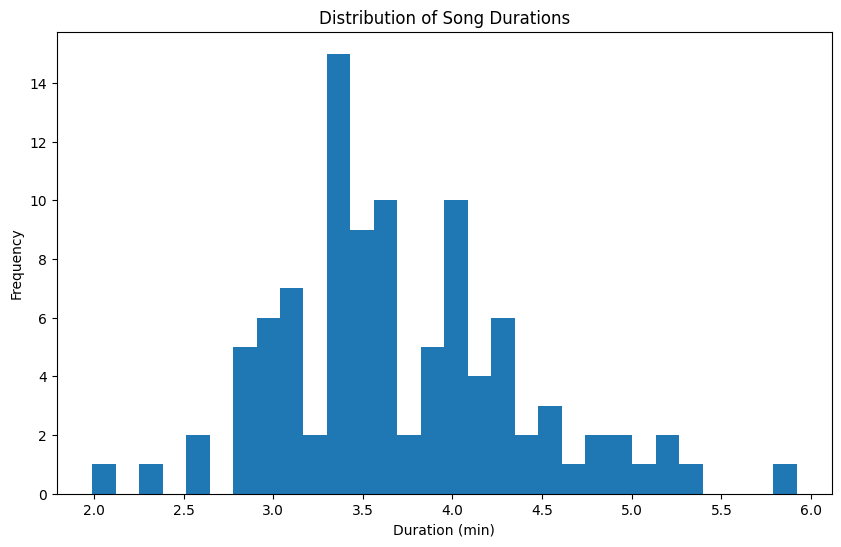

In [50]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music & sonic Features

In [51]:
#In comparison, Obama playlists' average danceability is 63.65% -- almost identical!
print("Average track danceability: ", round(df["danceability"].mean(),2))
print("Median Track danceability: ", round(df["danceability"].median(),2))
print("Max track danceability: ", round(df["danceability"].max(),2))
print("Min track danceability: ", round(df["danceability"].min(),2))


Average track danceability:  63.81
Median Track danceability:  63.25
Max track danceability:  90.8
Min track danceability:  35.1


In [53]:
#In comparison, Obama playlists' average energy is xxx.
print("Average track energy: ", round(df["energy"].mean(),2))
#print("Median Track energy: ", round(df["energy"].median(),2))
print("Max track energy: ", round(df["energy"].max(),2))
print("Min track energy: ", round(df["energy"].min(),2))

Average track energy:  62.74
Max track energy:  92.2
Min track energy:  26.4


In [54]:
#In comparison, Obama playlists' average loudness is -8.2: here, the difference shows there are more "non-commercial" songs in Obama's playlists.
print("Average track loudness: ", round(df["loudness"].mean(),2))
#print("Median Track loudness: ", round(df["loudness"].median(),2))
print("Max track loudness: ", round(df["loudness"].max(),2))
print("Min track loudness: ", round(df["loudness"].min(),2))

Average track loudness:  -6.2
Max track loudness:  -2.28
Min track loudness:  -10.96


In [55]:
#In comparison, Obama playlists exhibits a slightly happier feeling, with an average valence of 55%.
print("Average track valence: ", round(df["valence"].mean(),2))
#print("Median Track valence: ", round(df["valence"].median(),2))
print("Max track valence: ", round(df["valence"].max(),2))
print("Min track valence: ", round(df["valence"].min(),2))

Average track valence:  48.91
Max track valence:  96.9
Min track valence:  5.9


In [56]:
print("Average track liveness: ", round(df["liveness"].mean(),2))
#print("Median Track liveness: ", round(df["liveness"].median(),2))
print("Max track liveness: ", round(df["liveness"].max(),2))
print("Min track liveness: ", round(df["liveness"].min(),2))

Average track liveness:  16.1
Max track liveness:  77.6
Min track liveness:  2.32


In [57]:
print("Average track speechiness: ", round(df["speechiness"].mean(),2))
#print("Median Track speechiness: ", round(df["speechiness"].median(),2))
print("Max track speechiness: ", round(df["speechiness"].max(),2))
print("Min track speechiness: ", round(df["speechiness"].min(),2))

Average track speechiness:  8.59
Max track speechiness:  43.8
Min track speechiness:  2.32


In [58]:
#An overwhelming maority of 4/4 songs, which is to be expected with most streamed songs!
print(df["time_signature"].value_counts())

time_signature
4    98
3     2
Name: count, dtype: int64


In [59]:
df["mode"].value_counts()

mode
Major    65
Minor    35
Name: count, dtype: int64

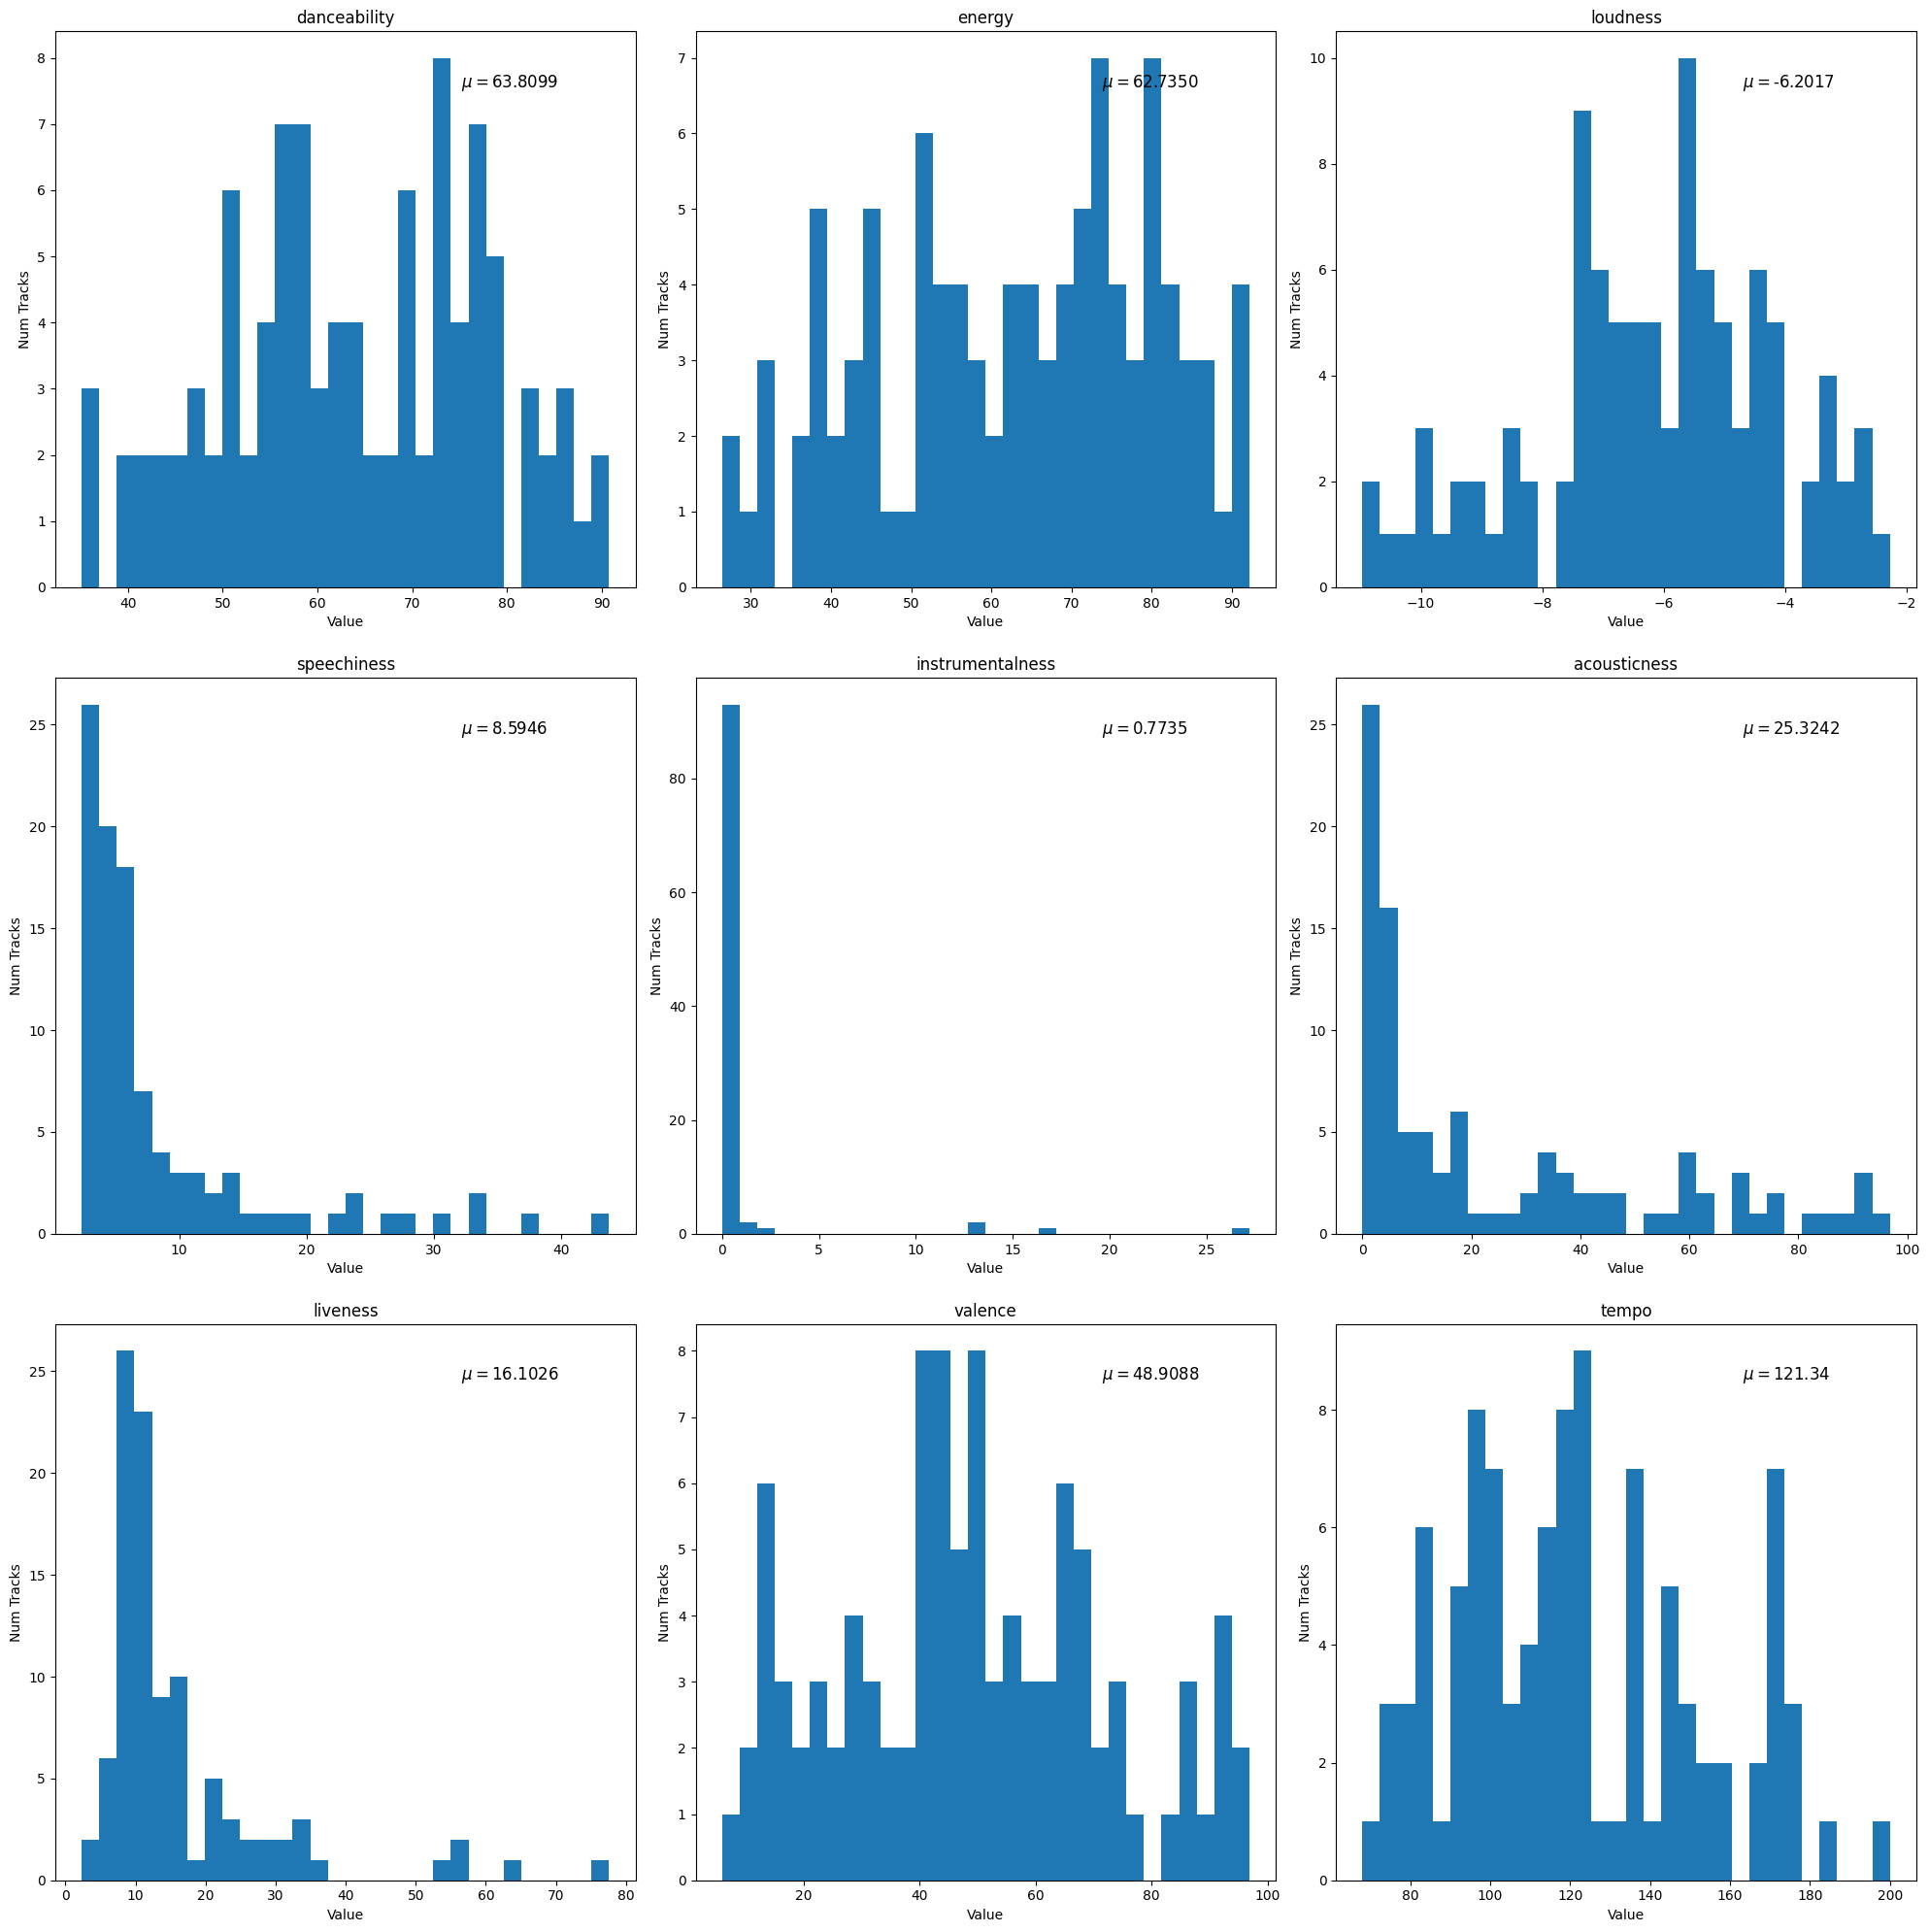

In [60]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

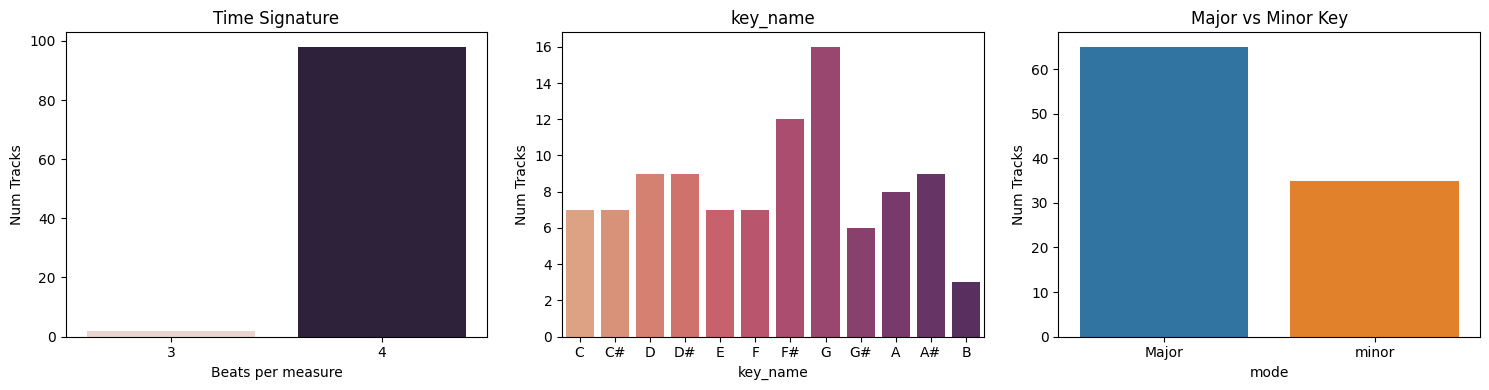

In [61]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='time_signature', hue='time_signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key_name', hue='key_name', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('key_name')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['Major', 'minor'])
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key')

plt.tight_layout(w_pad=2)
plt.show()